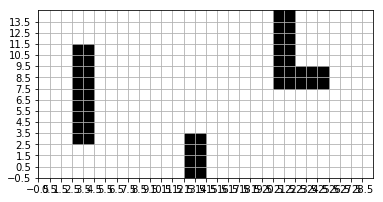

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
from envSetup import EnvSetup

class CustomizedShape():
    def __init__(self):
        # Define the shape of a robot.
        shape_description_robot = [
            (1., 2., mpath.Path.MOVETO),
            (1., 1., mpath.Path.LINETO),
            (2., 1., mpath.Path.LINETO),
            (2., -1., mpath.Path.LINETO),
            (1., -1., mpath.Path.LINETO),
            (1., -2., mpath.Path.LINETO),
            (-1., -2., mpath.Path.LINETO),
            (-1., -1., mpath.Path.LINETO),
            (-2., -1., mpath.Path.LINETO),
            (-2., 1., mpath.Path.LINETO),
            (-1., 1., mpath.Path.LINETO),
            (-1., 2., mpath.Path.LINETO),
            (0., 0., mpath.Path.CLOSEPOLY),
        ]
        u, v, codes = zip(*shape_description_robot)
        self.marker_robot = mpath.Path(np.asarray((u, v)).T, codes)

        
        # Define the shape of a target.
        shape_description_target = [
            (np.cos(72*3.25*np.pi/180), np.sin(72*3.25*np.pi/180), mpath.Path.MOVETO),
            (np.cos(72*1.25*np.pi/180), np.sin(72*1.25*np.pi/180), mpath.Path.LINETO),
            (np.cos(72*4.25*np.pi/180), np.sin(72*4.25*np.pi/180), mpath.Path.LINETO),
            (np.cos(72*2.25*np.pi/180), np.sin(72*2.25*np.pi/180), mpath.Path.LINETO),
            (np.cos(72*0.25*np.pi/180), np.sin(72*0.25*np.pi/180), mpath.Path.LINETO),
            (np.cos(72*3.25*np.pi/180), np.sin(72*3.25*np.pi/180), mpath.Path.LINETO),
            (0., 0., mpath.Path.CLOSEPOLY),
        ]
        u, v, codes = zip(*shape_description_target)
        self.marker_target = mpath.Path(np.asarray((u, v)).T, codes)
        
        
        # Define the walls.
        pos_wall = np.array(EnvSetup().nodes_wall)
        n_walls = len(pos_wall)
        self.walls = np.zeros(n_walls, dtype=[('position', float, 2),
                                        ('shape', patches.Rectangle, 1)])
        for index in np.arange(n_walls):
            self.walls['position'][index] = pos_wall[index] - 0.5
            self.walls['shape'][index] = patches.Rectangle(self.walls['position'][index], 1., 1., color='k')
        
        
            

# data = np.random.rand(8, 8)
# plt.scatter(data[:, 0], data[:, 1], c='0.75', marker=CustomizedShape().marker_robot, s=64)

# fig, ax = plt.subplots()
# for shape in CustomizedShape().walls['shape']:
#     ax.add_patch(shape)
    
# ax.grid(True)
# ax.set_xlim(0-0.5, 29+0.5)
# ax.set_ylim(0-0.5, 14+0.5)
# x_ticks = np.arange(0-0.5, 29 + 0.5, 1)
# y_ticks = np.arange(0-0.5, 14 + 0.5, 1)
# ax.set_xticks(x_ticks)
# ax.set_yticks(y_ticks)
# ax.set_aspect('equal')


# plt.show()